## Predicting Peak Oil Production Rate

In this project, we will build a series of models to predict the peak oil production rate of an oil well. Predicting this quantity provides valuable
insights on the overall production profile of an oil well, which is essential for making informed decisions down the road.

## Outline

The workflow of our approach is as follows:
- Data Exploration and Pre-processing: Visualize the raw input data and observe patterns in correlation. Then, pre-process the data in a reasonable manner.
- Model Building: Construct baseline linear and non-linear models to predict the peak oil production rate.
- Evaluation: Use R-Squared and RMSE to evaluate the models and compare their performance. 
- Conclusions: Draw conclusions on performance capablity based on the evaluation phase.

## Data Exploration

There are numerous descriptive variables in our dataset. These include:
- relative_well_position
- batch_frac_classification
- frac_type
- well_family_relationship
- ffs_frac_type

In [46]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from typing import *

# Ignore warnings
warnings.simplefilter("ignore")

# Path to the training data
training_path = "./training.csv"

Start by reading in the training data and dropping any irrelevant features. Also, drop any rows that do not have an OilPeakRate value.

In [47]:
raw_df = pd.read_csv(training_path)
raw_df = raw_df.drop(columns=["Unnamed: 0", "pad_id", "standardized_operator_name", "surface_x", "surface_y", "bh_x", "bh_y", "horizontal_midpoint_x",
                                "horizontal_midpoint_y", "horizontal_toe_x", "horizontal_toe_y", "frac_type"])
raw_df = raw_df.dropna(subset=["OilPeakRate"])
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19306 entries, 0 to 29436
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gross_perforated_length       19148 non-null  float64
 1   number_of_stages              2643 non-null   float64
 2   total_proppant                17912 non-null  float64
 3   total_fluid                   17866 non-null  float64
 4   true_vertical_depth           19201 non-null  float64
 5   ffs_frac_type                 14310 non-null  object 
 6   proppant_intensity            17872 non-null  float64
 7   frac_fluid_intensity          17821 non-null  float64
 8   average_stage_length          2620 non-null   float64
 9   average_proppant_per_stage    2595 non-null   float64
 10  average_frac_fluid_per_stage  2582 non-null   float64
 11  proppant_to_frac_fluid_ratio  17501 non-null  float64
 12  frac_fluid_to_proppant_ratio  17501 non-null  float64
 13  bin_la

## Preliminary Visualization

In [48]:
all_variables_df = raw_df.dropna()
all_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 344 to 29431
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gross_perforated_length       1996 non-null   float64
 1   number_of_stages              1996 non-null   float64
 2   total_proppant                1996 non-null   float64
 3   total_fluid                   1996 non-null   float64
 4   true_vertical_depth           1996 non-null   float64
 5   ffs_frac_type                 1996 non-null   object 
 6   proppant_intensity            1996 non-null   float64
 7   frac_fluid_intensity          1996 non-null   float64
 8   average_stage_length          1996 non-null   float64
 9   average_proppant_per_stage    1996 non-null   float64
 10  average_frac_fluid_per_stage  1996 non-null   float64
 11  proppant_to_frac_fluid_ratio  1996 non-null   float64
 12  frac_fluid_to_proppant_ratio  1996 non-null   float64
 13  bin_l

<Axes: >

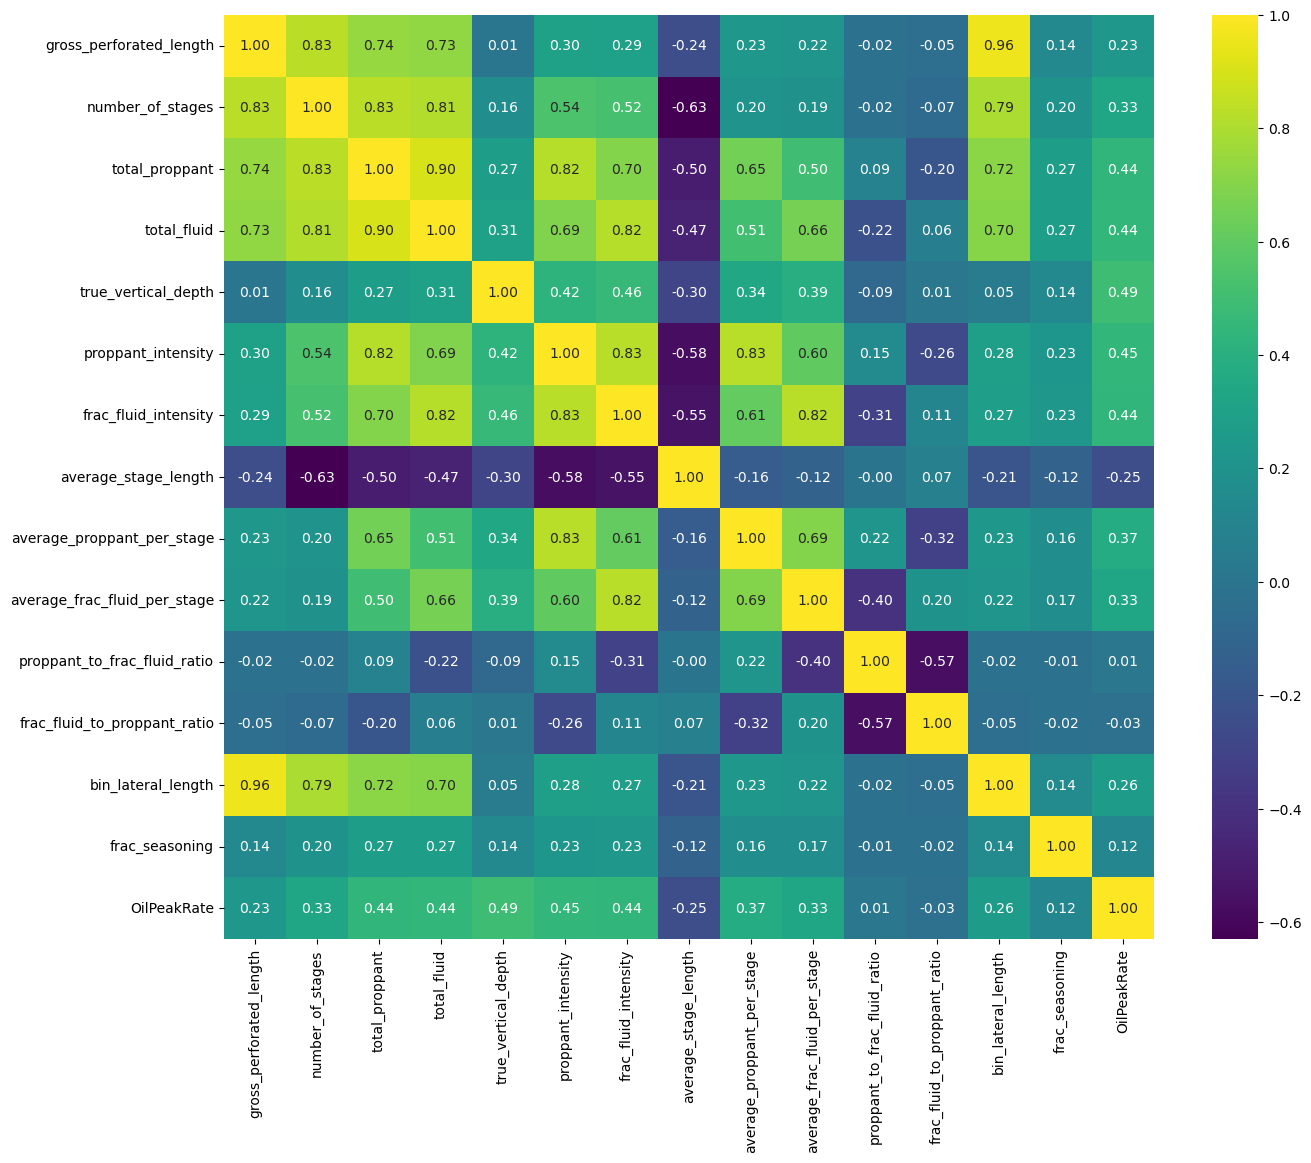

In [49]:
plt.figure(figsize=(15, 12))
# Selecting only the non-categorical variables from the DataFrame
non_categorical_data = all_variables_df.select_dtypes(include=[np.number])

sns.heatmap(non_categorical_data.corr(), annot=True, fmt=".2f", cmap='viridis')

In [50]:
def visualize_categorical_variable(raw_df: pd.DataFrame, category: str):
    raw_df = raw_df.dropna(subset=[category])
    unique_values = raw_df[category].unique()

    position_mapping = {value: index for index, value in enumerate(sorted(unique_values))}
    raw_df[category] = raw_df[category].replace(position_mapping)

    # Plotting
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=raw_df, x=category, y='OilPeakRate', palette='viridis', showfliers=False)

    # Customizing the plot
    plt.title(f'Oil Peak Rate vs. {category.capitalize()}')
    plt.xlabel(category.capitalize())
    plt.ylabel('Oil Peak Rate')

    # Set x-ticks dynamically based on the unique values and their mapping
    plt.xticks(range(len(position_mapping)), list(position_mapping.keys()))

    plt.show()

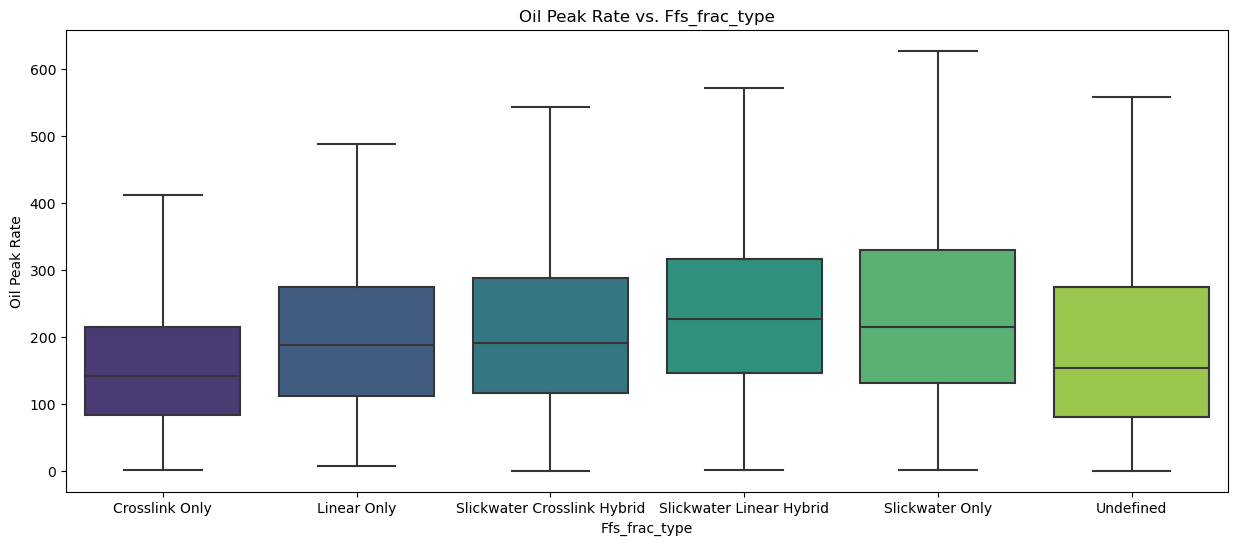

In [51]:
visualize_categorical_variable(raw_df, "ffs_frac_type")